In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:

import pandas as  pd
import numpy as np
import csv
from tqdm import tqdm
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


import nltk


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
org = pd.read_csv(r"E:\Study\Sem 6\NLP\zomato.csv",dtype = str)
org.shape

(51717, 17)

In [7]:
org.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df = org.drop(["url","dish_liked","phone"],axis = 1)

In [9]:
print("number of duplicated values:",df.duplicated().sum())
df.drop_duplicates(inplace=True)


number of duplicated values: 43


In [10]:
print("number of null values:\n",df.isnull().sum())
df.dropna(how='any',inplace=True)


number of null values:
 address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  object
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [12]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [13]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',',''))
df['cost'] = df['cost'].astype(float)


In [14]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
df = df.loc[df.rate != 'NEW']
df = df.loc[df.rate != '-']

df.rate = df.rate.apply(lambda x: x.replace('/5','')).str.strip().astype(float)

df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [16]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
df.reviews_list[0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [18]:
eval(df.reviews_list[0])

[('Rated 4.0',
  'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.'),
 ('Rated 4.0',
  'RATED\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers'),
 ('Rated 2.0',
  'RATED\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mos

In [19]:
all_ratings = []

for ratings in df['reviews_list']:
    ratings = eval(ratings)
    
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            
            score = float(score)
            all_ratings.append([score, doc])

In [20]:
ratings_df = pd.DataFrame(all_ratings, columns=['score', 'doc'])

print(ratings_df.shape)
ratings_df.head(10)

(1295849, 2)


,score,doc
0,4.0,A beautiful place to dine in.The interiors tak...
1,4.0,I was here for dinner with my family on a week...
2,2.0,Its a restaurant near to Banashankari BDA. Me ...
3,4.0,We went here on a weekend and one of us had th...
4,5.0,The best thing about the place is itÃÃÃÃ...
5,5.0,Great food and pleasant ambience. Expensive bu...
6,4.0,Good ambience with tasty food.\nCheese chilli ...
7,4.0,You canÃÃÃÃÃÃÃÃt go wrong with...
8,5.0,Overdelighted by the service and food provided...
9,4.0,The place is nice and comfortable. Food wise a...


In [21]:
ratings_df['doc'][15]

'I was looking for a quite place to spend some time with family and as well wanted to try some new place. Since I was at Banashankari I thought of trying this place. The place had good rating and was part of Zomato gold. So I decided to try this place. It was a delite to see a very friendly staff and food we ordered was very tasty as well.\n\nFood : 4/5\nAmbience :3/5\nFriendly staff : 4/5\nPocket friendly : 4/5\n\nWill definitely visit again ??'

In [22]:
ratings_df['score'] = np.where(ratings_df.score.astype(int)>2.5,1,-1)
ratings_df

,score,doc
0,1,A beautiful place to dine in.The interiors tak...
1,1,I was here for dinner with my family on a week...
2,-1,Its a restaurant near to Banashankari BDA. Me ...
3,1,We went here on a weekend and one of us had th...
4,1,The best thing about the place is itÃÃÃÃ...
...,...,...
1295844,1,My review based on food drink service\n\nFood:...
1295845,1,I visited chime bar at Sheraton hotel it was n...
1295846,1,This restaurant is situated inside grand Shera...
1295847,1,"Great ambience , looking nice good selection o..."


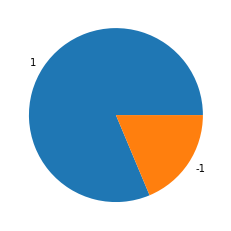

In [23]:
plt.pie(ratings_df['score'].value_counts(), labels= ratings_df["score"].unique())
plt.show()
#add title and other stuff

In [37]:
x , y = pd.DataFrame(ratings_df['doc']),pd.DataFrame(ratings_df['score'])


### Undersampling

In [39]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x[:50000], y[:50000])

In [40]:
new_df = pd.concat([x_under,y_under],axis =1)

In [41]:
new_df.head()

,doc,score
0,Its a restaurant near to Banashankari BDA. Me ...,-1
1,I had a very bad experience here.\nI don't kno...,-1
2,Spice elephant soup SPL: almost manchow flavou...,-1
3,Really disappointed with the place.\n\nSeems l...,-1
4,Cockroaches !! I Repeat cockroaches!!Bakasura ...,-1


In [42]:
#remove sub ratings
new_df['doc'] = new_df.doc.str.replace(r'[0-9.]*[0-9]/[0-9]*[0-9]', "x")

C:\Users\srich\AppData\Local\Temp/ipykernel_8780/3969828558.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['doc'] = new_df.doc.str.replace(r'[0-9.]*[0-9]/[0-9]*[0-9]', "x")


In [43]:
#covert to lower case
new_df['doc'] = new_df['doc'].str.lower()

In [44]:
new_df.head()

,doc,score
0,its a restaurant near to banashankari bda. me ...,-1
1,i had a very bad experience here.\ni don't kno...,-1
2,spice elephant soup spl: almost manchow flavou...,-1
3,really disappointed with the place.\n\nseems l...,-1
4,cockroaches !! i repeat cockroaches!!bakasura ...,-1


In [45]:
#removing punctuations
new_df['doc'] = new_df.doc.str.replace(r'[^\w\s]', ' ')

#removing urls
new_df['doc'] = new_df.doc.str.replace(r'https?://\S+|www\.\S+', ' ')

C:\Users\srich\AppData\Local\Temp/ipykernel_8780/4255293140.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['doc'] = new_df.doc.str.replace(r'[^\w\s]', ' ')
C:\Users\srich\AppData\Local\Temp/ipykernel_8780/4255293140.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['doc'] = new_df.doc.str.replace(r'https?://\S+|www\.\S+', ' ')


In [46]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [47]:
#remove stop words
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
new_df['doc'] = new_df['doc'].apply(lambda x: " ".join([lem.lemmatize(word) for word in x.split() if word not in stop_words]))

### TF-IDF 

In [86]:
x,y =new_df['doc'],new_df['score']


In [90]:
vectoriser = TfidfVectorizer(lowercase= False)
vectoriser.fit(new_df['doc'])
x = vectoriser.transform(x)



### Train -Test- Split

In [91]:
x_train,x_test,y_train,y_test=train_test_split( x,y, random_state= 0 )

# Model Building


In [114]:
x =[]
y =[]

### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(random_state=0,
                          solver='newton-cg')
clf1.fit(x_traintf,y_train)
res = clf1.score(x_testtf,y_test)
print("Train set accuracy:",clf1.score(x_traintf,y_train))

print("Test set accuracy:",res)
x.append("Logistic Regression")
y.append(res)

Train set accuracy: 0.9307737056428156
Test set accuracy: 0.9089810712847362


### Decision Trees


In [116]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion ="entropy")
clf.fit(x_traintf,y_train)
res = clf.score(x_testtf,y_test)
print("Train set accuracy:",clf.score(x_traintf,y_train))

print("Test set accuracy:",res)
x.append("Decision Tree")
y.append(res)

Train set accuracy: 0.9842484449814293
Test set accuracy: 0.938246744529467


### SVM


In [117]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_traintf, y_train)

res = svm.score(x_testtf,y_test)
print("Train set accuracy:",svm.score(x_traintf,y_train))

print("Test set accuracy:",res)
x.append("SVM")
y.append(res)

Train set accuracy: 0.9787890992079473
Test set accuracy: 0.9467042556047791


### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_traintf,y_train)

res = rf.score(x_testtf,y_test)
print("Train set accuracy:",rf.score(x_traintf,y_train))

print("Test set accuracy:",res)
x.append("Random Forest")
y.append(res)

Train set accuracy: 0.9842484449814293
Test set accuracy: 0.9535508121895556


# Comparisons


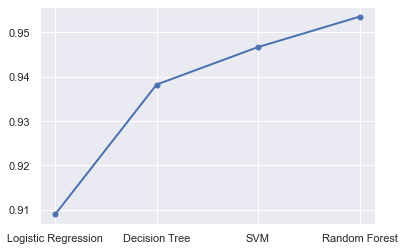

In [130]:
sns.set_theme()
plt.plot(np.array(x),np.array(y), 'bo-', linewidth=2, markersize=5)
